In [1]:
# In this exercise you'll identify an initial set of features in the Ames dataset to develop 
# using mutual information scores and interaction plots.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


# Load data
data = pd.read_csv("C:/Users/HP/Desktop/Kaggle Assignment/Feature Engineering/mutual info/ames.csv")
df=pd.DataFrame(data)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37.0,7937.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,0.0,No_Pool,Good_Privacy,None,0.0,3,2006,WD,Normal,142500
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0.0,8885.0,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2006,WD,Normal,131000
2927,Split_Foyer,Residential_Low_Density,62.0,10441.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,Shed,700.0,7,2006,WD,Normal,132000
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77.0,10010.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,No_Fence,None,0.0,4,2006,WD,Normal,170000


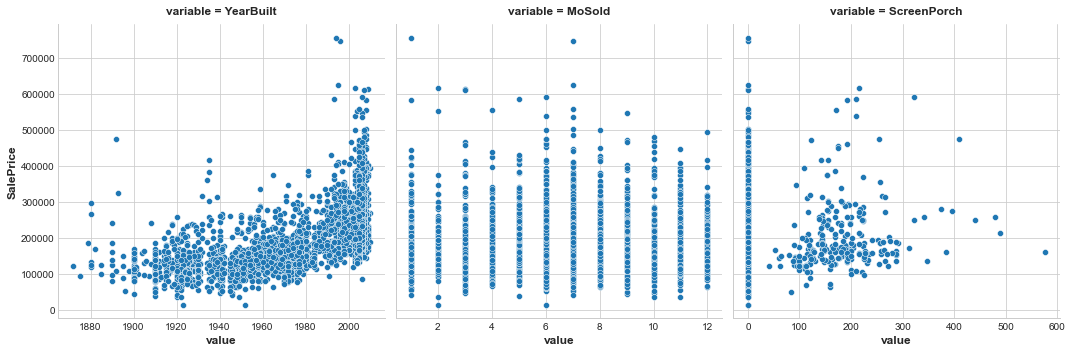

In [2]:
# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# To start, let's review the meaning of mutual information by looking at a few features from the Ames dataset.
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
)

OverallQual     0.581262
Neighborhood    0.569813
GrLivArea       0.496909
YearBuilt       0.437939
GarageArea      0.415014
TotalBsmtSF     0.390280
GarageCars      0.381467
FirstFlrSF      0.368825
BsmtQual        0.364779
KitchenQual     0.326194
ExterQual       0.322390
YearRemodAdd    0.315402
MSSubClass      0.287131
GarageFinish    0.265440
FullBath        0.251693
Foundation      0.236115
LotFrontage     0.233334
GarageType      0.226117
FireplaceQu     0.221955
SecondFlrSF     0.200658
Name: MI Scores, dtype: float64


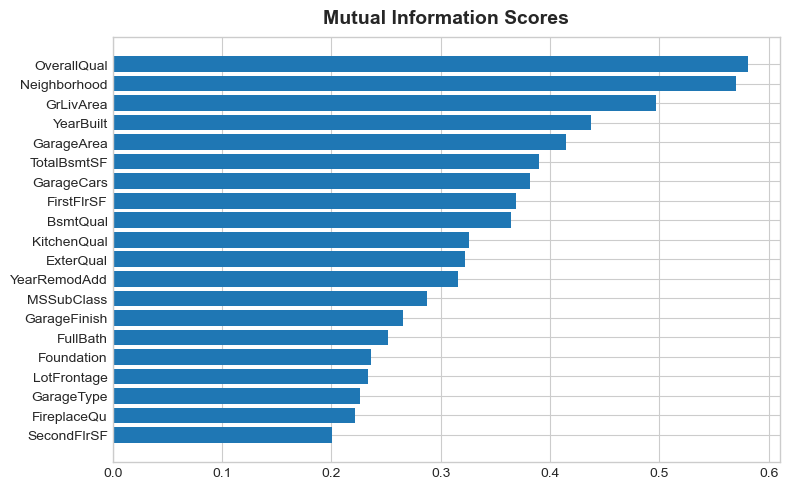

In [3]:
# charts showing sale_price to YearBuilt, MoSold, and ScreenPorch

# 1) Understand Mutual Information
# Based on the plots, which feature do you think would have the highest mutual information with SalePrice?
# Based on the plots, YearBuilt should have the highest MI score since knowing the year 
# tends to constrain SalePrice to a smaller range of possible values. 
# This is generally not the case for MoSold, however. 
# Finally, since ScreenPorch is usually just one value, 0, on average it won't tell you much about SalePrice 
# (though more than MoSold).

# The Ames dataset has seventy-eight features -- a lot to work with all at once! 
# Fortunately, you can identify the features with the most potential.
# Use the make_mi_scores function (introduced in the tutorial) to compute mutual information scores 
# for the Ames features:
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)

# Now examine the scores using the functions in this cell. Look especially at top and bottom ranks.
print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

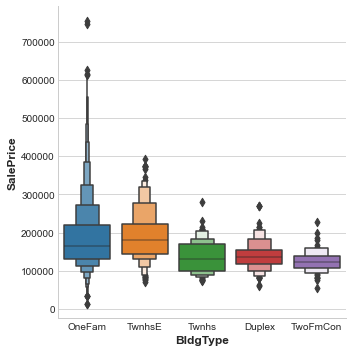

In [4]:
# 2) Examine MI Scores
# Do the scores seem reasonable? Do the high scoring features represent things you'd think most people 
# would value in a home? Do you notice any themes in what they describe?
# Some common themes among most of these features are:
# Location: Neighborhood
# Size: all of the Area and SF features, and counts like FullBath and GarageCars
# Quality: all of the Qual features
# Year: YearBuilt and YearRemodAdd
# Types: descriptions of features and styles like Foundation and GarageType

# In this step you'll investigate possible interaction effects for the BldgType feature. 
# This feature describes the broad structure of the dwelling in five categories:
# Bldg Type (Nominal): Type of dwelling
#   1Fam    Single-family Detached    
#   2FmCon    Two-family Conversion; originally built as one-family dwelling
#   Duplx    Duplex
#   TwnhsE    Townhouse End Unit
#   TwnhsI    Townhouse Inside Unit
# The BldgType feature didn't get a very high MI score. 
# A plot confirms that the categories in BldgType don't do a good job of distinguishing values in SalePrice 
# (the distributions look fairly similar, in other words):
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen")

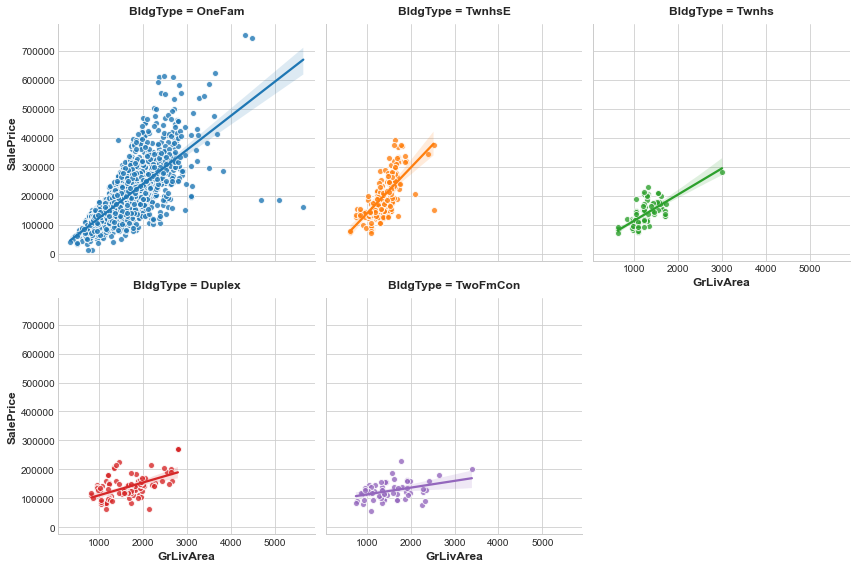

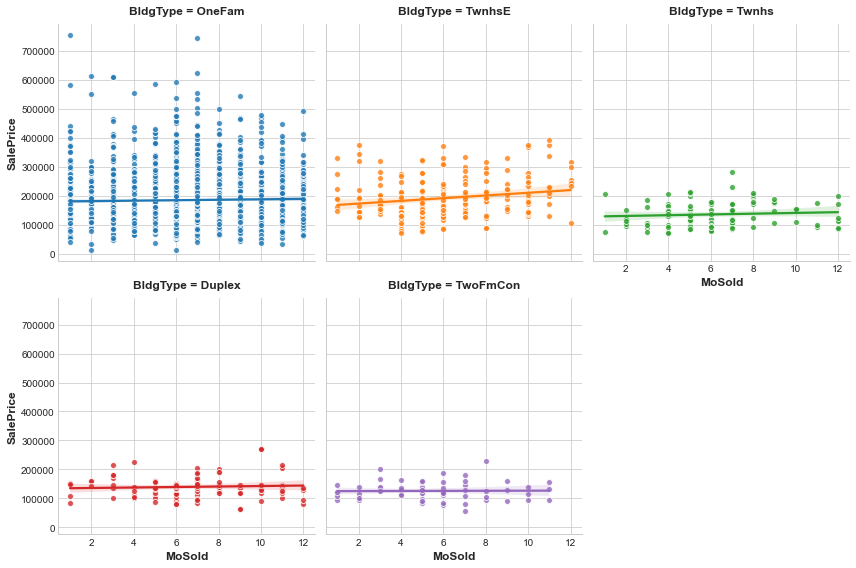

In [5]:
# Run the following cell twice, the first time with feature = "GrLivArea" and the next time with feature="MoSold":
# YOUR CODE HERE: 
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

feature = "MoSold"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
)